# Análise de Evasão de Clientes (Churn) - Telecom X

**Objetivo:** Este notebook apresenta uma análise exploratória completa sobre os dados de churn da Telecom X. O processo segue as etapas de Extração, Transformação e Carga (ETL), culminando em uma Análise Exploratória de Dados (EDA) para identificar os principais fatores que levam ao cancelamento de serviços.

## 1. Extração e Diagnóstico Inicial

Nesta primeira fase, os dados brutos em formato JSON são carregados. Realizamos um diagnóstico inicial para entender a estrutura, os tipos de dados e a presença de valores ausentes ou inconsistentes.

In [ ]:
import pandas as pd
import json

# Carregando o arquivo JSON com os dados dos clientes
with open('TelecomX_Data.json') as f:
    dados_json = json.load(f)

# Convertendo os dados para um DataFrame do Pandas
dados_brutos = pd.json_normalize(dados_json)

# Exibe as primeiras linhas
print("Dados carregados com sucesso! As 5 primeiras linhas são:")
display(dados_brutos.head())

Dados carregados com sucesso! As 5 primeiras linhas são:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Verificando as informações gerais do DataFrame
print("Informações da Estrutura do DataFrame (Tipos de Dados e Nulos):\n")
dados_brutos.info()

Informações da Estrutura do DataFrame (Tipos de Dados e Nulos):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-nul

In [ ]:
# Verificando a contagem de valores ausentes por coluna
print("Contagem de Valores Ausentes por Coluna:\n")
print(dados_brutos.isnull().sum())

Contagem de Valores Ausentes por Coluna:

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


## 2. Limpeza e Transformação dos Dados (ETL)

Com base no diagnóstico, esta seção foca em limpar e preparar os dados para a análise.

### Dicionário de Dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

### 2.1. Renomeação de Colunas e Tratamento de Inconsistências
As colunas foram renomeadas para um padrão mais claro. Em seguida, tratamos os valores ausentes escondidos nas colunas `Churn` e `Gasto_Total`, garantindo a integridade e o formato correto dos dados.

In [ ]:
# Criando uma cópia para as transformações
dados = dados_brutos.copy()

# Renomeando as colunas para um padrão mais limpo e em português
dados.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefonico',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total'
}, inplace=True)

In [ ]:
# Investigando os valores únicos para encontrar inconsistências escondidas
print("Valores únicos na coluna 'Churn':", dados['Churn'].unique())

print("\nAlguns valores únicos na coluna 'Gasto_Total' (os 15 primeiros):\n")
print(dados['Gasto_Total'].unique()[:15])

Valores únicos na coluna 'Churn': ['No' 'Yes' '']

Alguns valores únicos na coluna 'Gasto_Total' (os 15 primeiros):

['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9' '2460.55' '8456.75' '351.5' '7261.25' '2560.1']


In [ ]:
# 1. Tratando a coluna 'Churn'
# Filtra o DataFrame para manter apenas as linhas onde 'Churn' não é uma string vazia
dados_limpos = dados[dados['Churn'] != ''].copy()
print(f"Shape do DataFrame antes da limpeza de 'Churn': {dados.shape}")
print(f"\nShape do DataFrame após a limpeza de 'Churn': {dados_limpos.shape}")

Shape do DataFrame antes da limpeza de 'Churn': (7267, 21)

Shape do DataFrame após a limpeza de 'Churn': (7043, 21)


In [ ]:
# 2. Tratando a coluna 'Gasto_Total'
dados_limpos['Gasto_Total'] = pd.to_numeric(dados_limpos['Gasto_Total'], errors='coerce')

# Verificando quantos nulos foram criados nessa conversão
print(f"Valores nulos em 'Gasto_Total' após conversão: {dados_limpos['Gasto_Total'].isnull().sum()}")

# Substituí os valores nulos (que eram espaços) por 0
dados_limpos['Gasto_Total'] = dados_limpos['Gasto_Total'].fillna(0)
print(f"\nValores nulos em 'Gasto_Total' após preenchimento: {dados_limpos['Gasto_Total'].isnull().sum()}")

Valores nulos em 'Gasto_Total' após conversão: 11

Valores nulos em 'Gasto_Total' após preenchimento: 0


In [ ]:
# Verificando os tipos de dados para confirmar a mudança
print("Tipos de dados após a limpeza e conversão:\n")
dados_limpos.info()

Tipos de dados após a limpeza e conversão:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Churn                 7043 non-null   object 
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Parceiro              7043 non-null   object 
 5   Dependentes           7043 non-null   object 
 6   Meses_Contrato        7043 non-null   int64  
 7   Servico_Telefonico    7043 non-null   object 
 8   Multiplas_Linhas      7043 non-null   object 
 9   Servico_Internet      7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  Streaming_TV          7043 non-nu

### 2.2. Engenharia de Atributos e Padronização
Para enriquecer a análise, criamos a coluna `Gasto_Diario`. Além disso, padronizamos as variáveis categóricas (como 'Sim'/'Não' e 'Gênero') para o formato numérico (1/0), facilitando os cálculos e a aplicação de modelos estatísticos.

In [ ]:
# Criando a coluna 'Gasto_Diario' a partir do Gasto_Mensal
dados_limpos['Gasto_Diario'] = dados_limpos['Gasto_Mensal'] / 30    # um mês com 30 dias para o cálculo

# Padronizando colunas binárias (Yes/No) para o formato numérico (1/0)
colunas_para_converter = [
    'Churn', 'Parceiro', 'Dependentes', 'Servico_Telefonico', 'Fatura_Online'
]

for coluna in colunas_para_converter:
    dados_limpos[coluna] = dados_limpos[coluna].map({'Yes': 1, 'No': 0})

# O mesmo para a coluna 'Genero'
dados_limpos['Genero'] = dados_limpos['Genero'].map({'Male': 0, 'Female': 1})

# Verificando as primeiras linhas para ver o resultado das transformações
print("DataFrame com as novas colunas e dados padronizados:")
display(dados_limpos.head())

# Checando os tipos de dados novamente para garantir que as colunas foram convertidas
print("\nTipos de dados após a padronização:\n")
dados_limpos.info()

DataFrame com as novas colunas e dados padronizados:


,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,0,1,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Tipos de dados após a padronização:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Churn                 7043 non-null   int64  
 2   Genero                7043 non-null   int64  
 3   Idoso                 7043 non-null   int64  
 4   Parceiro              7043 non-null   int64  
 5   Dependentes           7043 non-null   int64  
 6   Meses_Contrato        7043 non-null   int64  
 7   Servico_Telefonico    7043 non-null   int64  
 8   Multiplas_Linhas      7043 non-null   object 
 9   Servico_Internet      7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  Streaming_TV          7043 non-null   o

## 3. Análise Exploratória de Dados (EDA)

Com os dados limpos e preparados, iniciamos a investigação visual para identificar os padrões de comportamento dos clientes que evadiram.

### 3.1. Distribuição Geral do Churn
O primeiro passo é entender a dimensão do problema, visualizando a proporção de clientes que cancelaram em relação à base total.

Contagem de Churn:

Churn
0    5174
1    1869
Name: count, dtype: int64



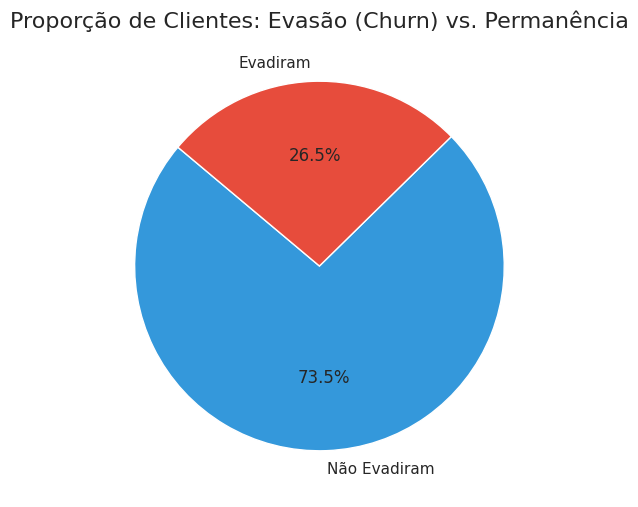

In [ ]:
# Importando as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Contando os valores de Churn (0 para 'Não' e 1 para 'Sim')
contagem_churn = dados_limpos['Churn'].value_counts()
print("Contagem de Churn:\n")
print(contagem_churn)
print()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_churn, labels=['Não Evadiram', 'Evadiram'], autopct='%1.1f%%', startangle=140, colors=['#3498db', '#e74c3c'])
plt.title('Proporção de Clientes: Evasão (Churn) vs. Permanência', fontsize=16)
plt.ylabel('') # Remove o label 'Churn' que o matplotlib coloca por padrão
plt.show()

### 3.2. Análise de Churn por Perfil Categórico
Investigamos como a evasão se distribui entre diferentes segmentos de clientes, como tipo de contrato, serviço de internet e método de pagamento.

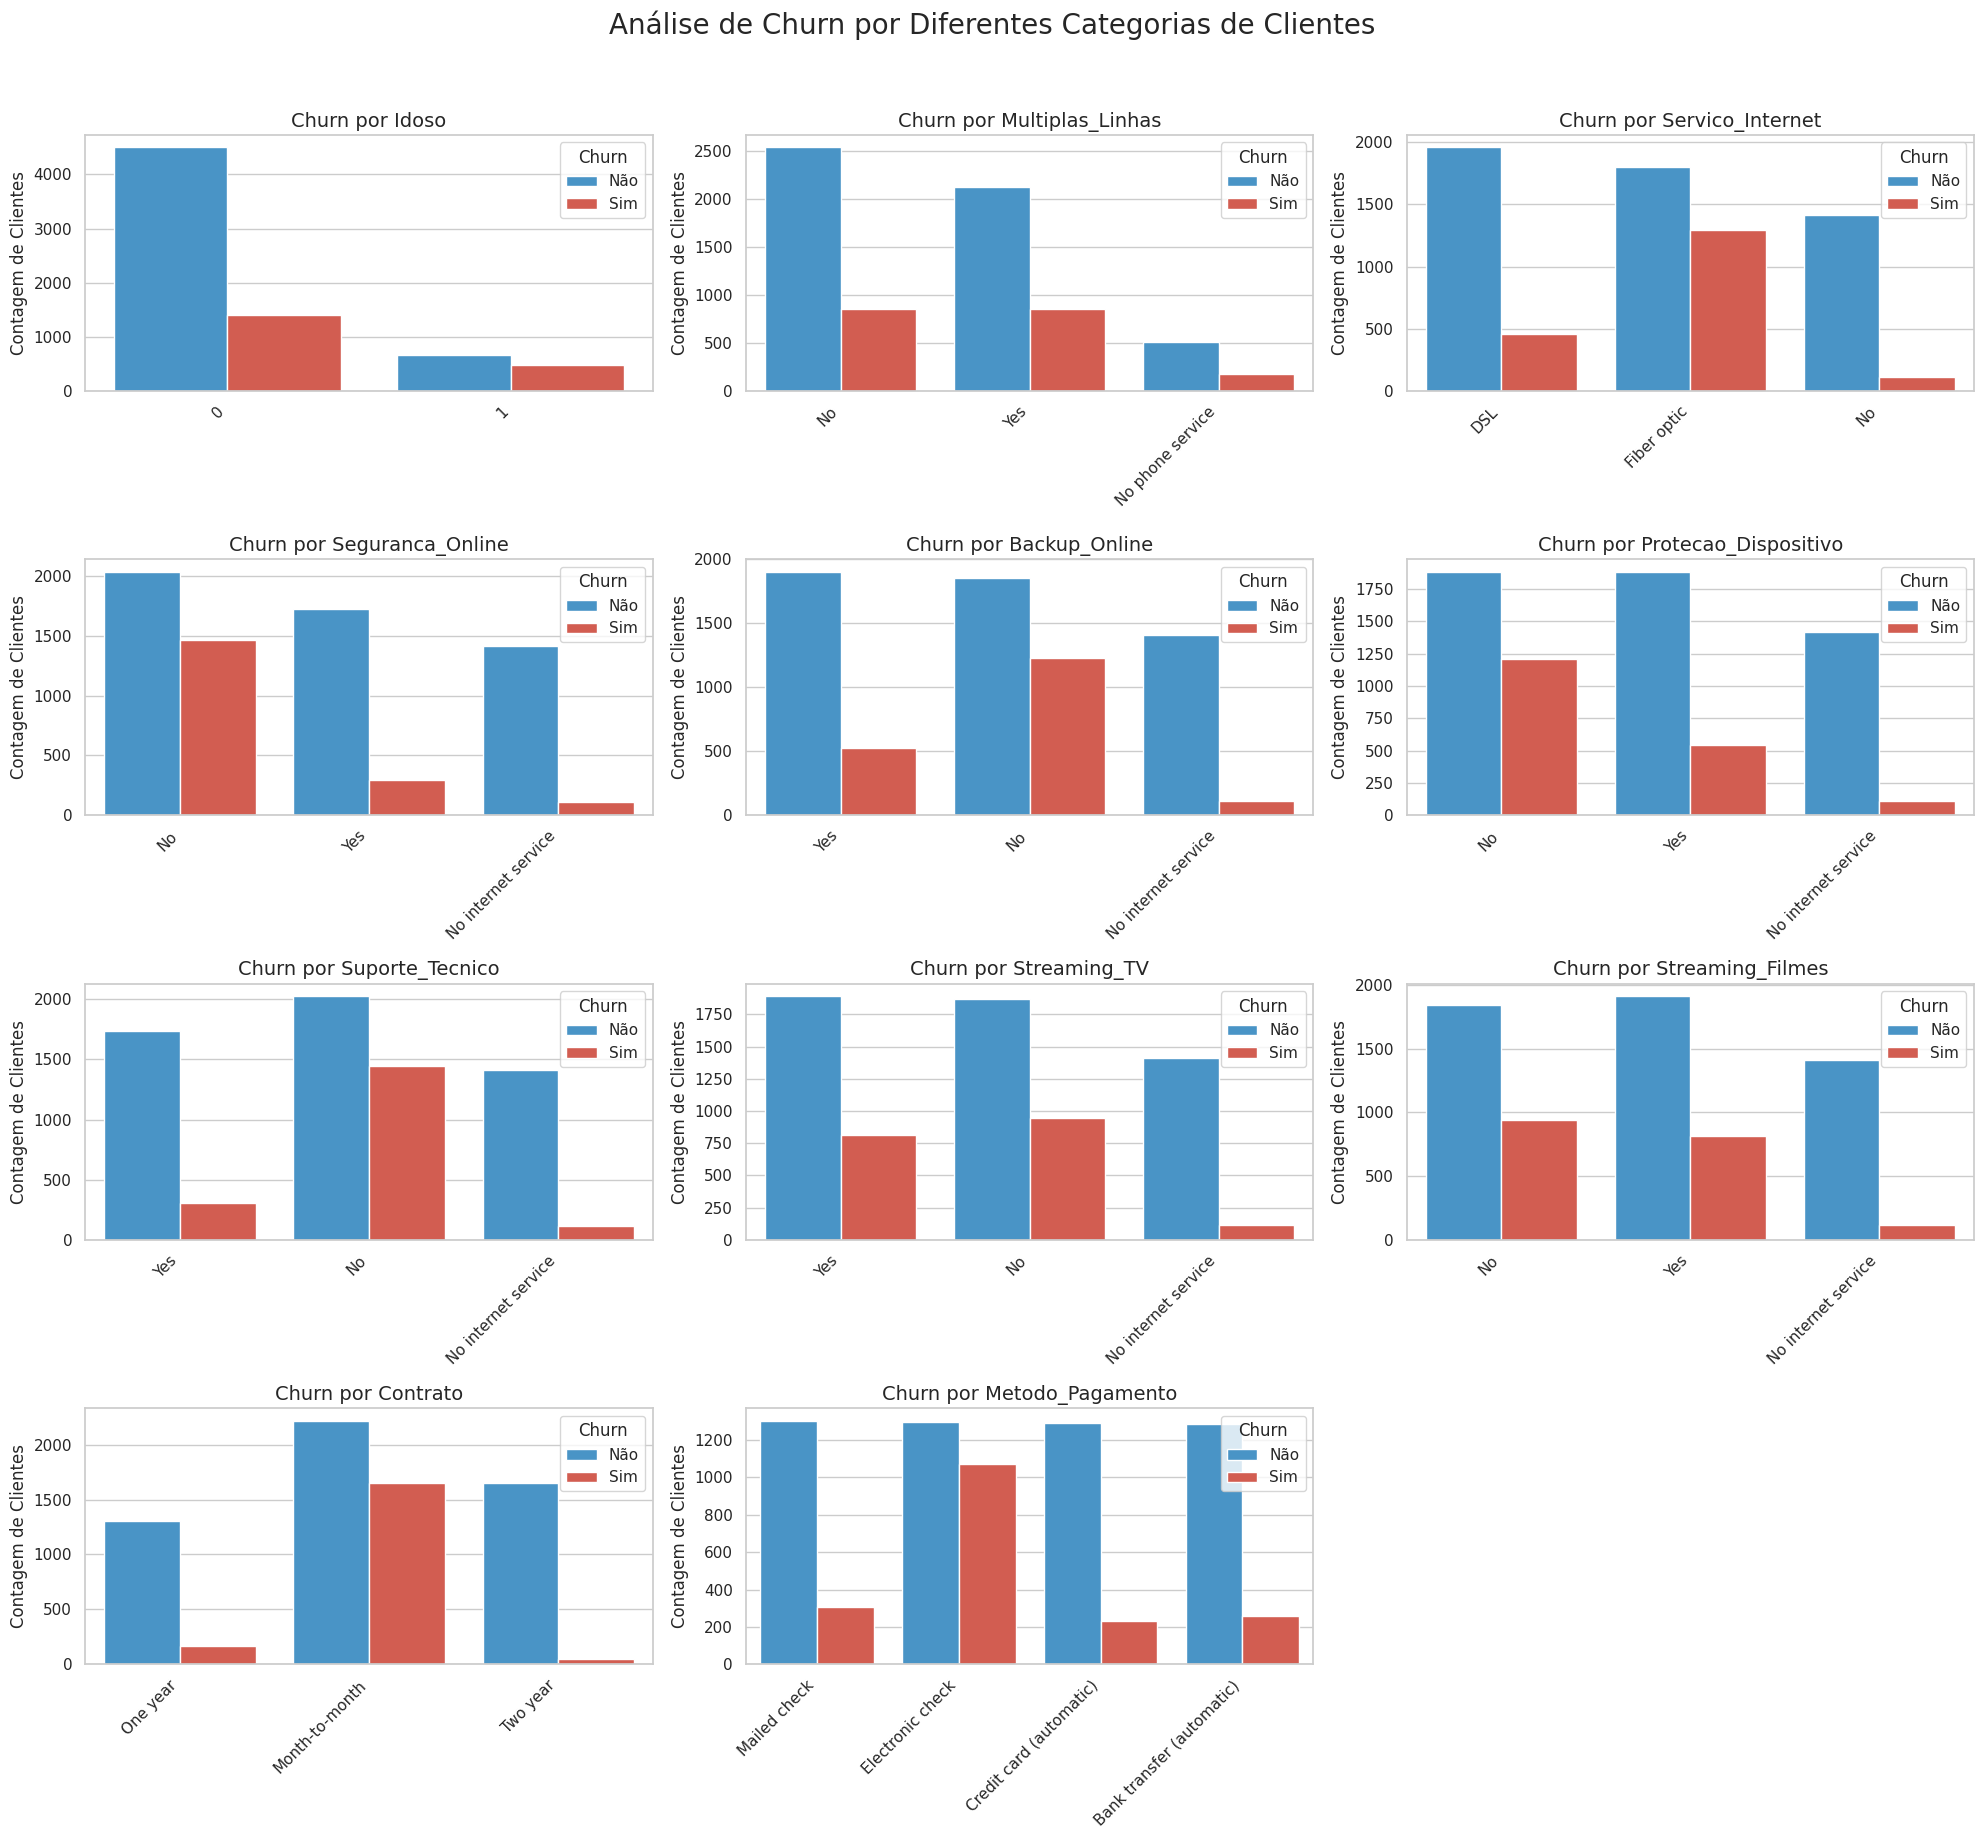

In [ ]:
colunas_categoricas = [
    'Idoso', 'Multiplas_Linhas', 'Servico_Internet',
    'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
    'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes',
    'Contrato', 'Metodo_Pagamento'
]

# Criando uma figura e um conjunto de subplots (um grid de gráficos)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))
fig.suptitle('Análise de Churn por Diferentes Categorias de Clientes', fontsize=20, y=1.02)

# O enumerate dá tanto o índice (i) quanto o valor (coluna) da lista
for i, coluna in enumerate(colunas_categoricas):
    ax = axes[i//3, i%3]
    sns.countplot(x=coluna, hue='Churn', data=dados_limpos, ax=ax, palette=['#3498db', '#e74c3c'])
    ax.set_title(f'Churn por {coluna}', fontsize=14)
    ax.set_xlabel('') # Limpa o label do eixo x para não poluir
    ax.set_ylabel('Contagem de Clientes')
    ax.legend(title='Churn', labels=['Não', 'Sim'])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Remove o último subplot vazio, se houver
if len(colunas_categoricas) < len(axes.flat):
    fig.delaxes(axes.flat[-1])
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### 3.3. Análise de Churn por Variáveis Numéricas
Analisamos a relação do churn com o tempo de contrato e os valores gastos pelos clientes, buscando identificar comportamentos de risco.

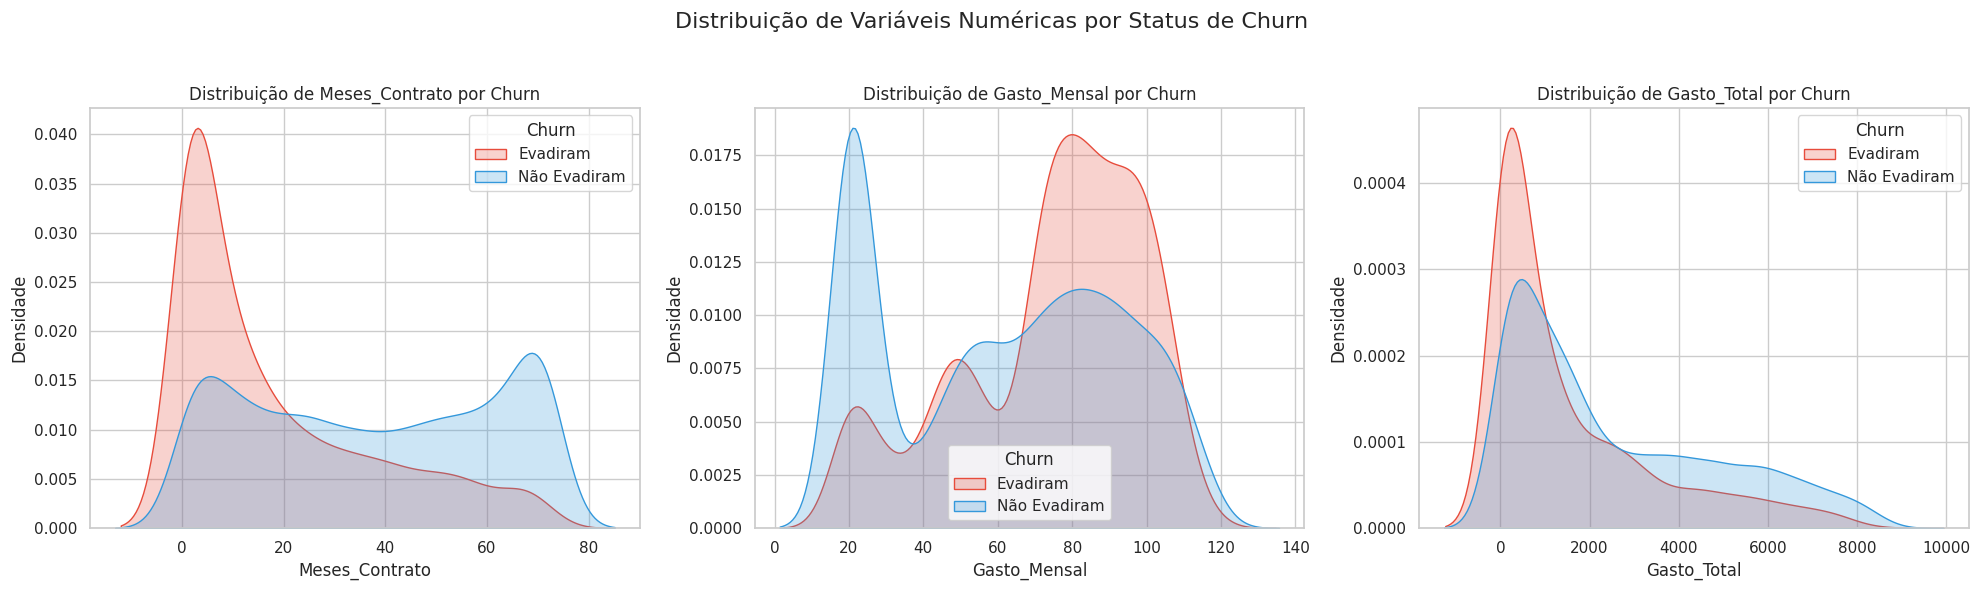

In [ ]:
# Lista das colunas numéricas
colunas_numericas = ['Meses_Contrato', 'Gasto_Mensal', 'Gasto_Total']

# Criando um grid de gráficos 1x3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Distribuição de Variáveis Numéricas por Status de Churn', fontsize=16)

# Iterando sobre as colunas para criar um gráfico para cada uma
for i, coluna in enumerate(colunas_numericas):
    ax = axes[i]
    sns.kdeplot(data=dados_limpos, x=coluna, hue='Churn', fill=True, ax=ax, palette=['#3498db', '#e74c3c'], common_norm=False)
    ax.set_title(f'Distribuição de {coluna} por Churn')
    ax.set_xlabel(coluna)
    ax.set_ylabel('Densidade')
    ax.legend(title='Churn', labels=['Evadiram', 'Não Evadiram'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 4. Análise de Correlação
Como passo adicional, geramos uma matriz de correlação para validar matematicamente as relações observadas entre as variáveis e o churn.

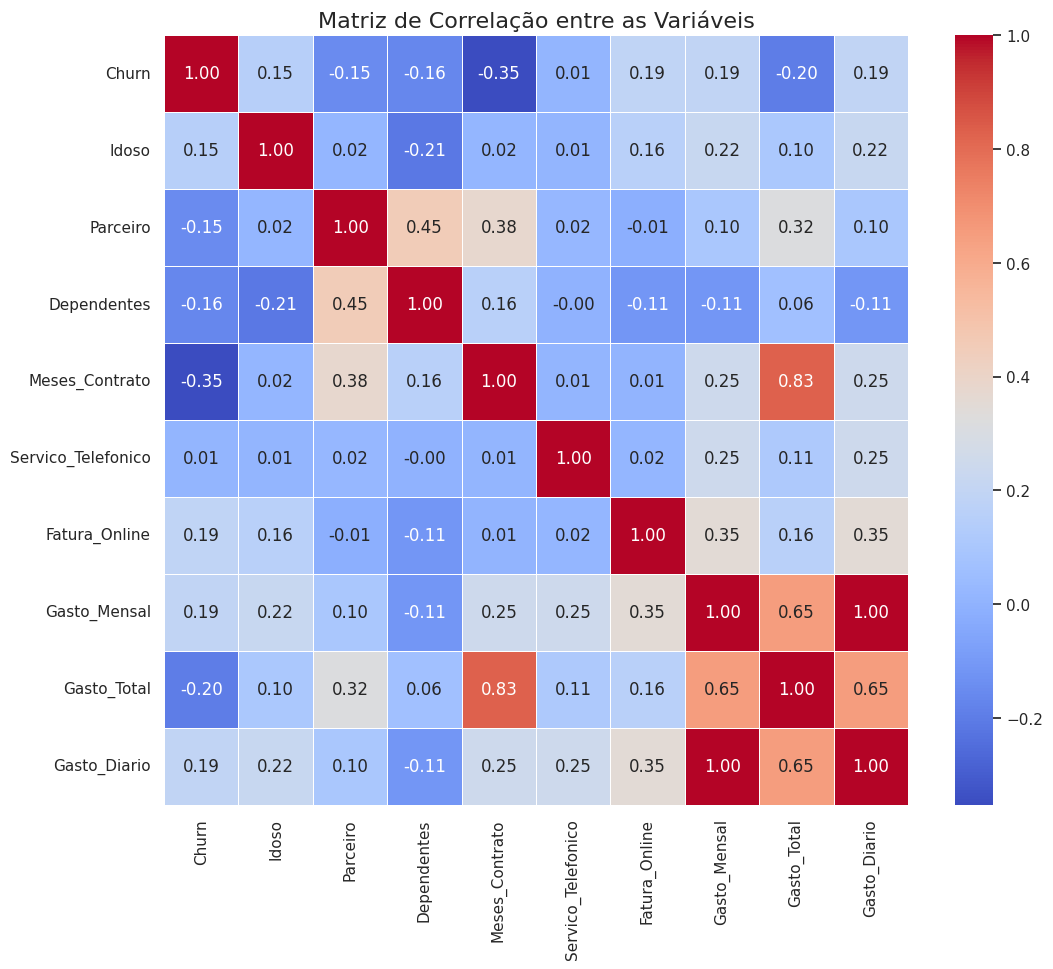

In [ ]:
dados_correlacao = dados_limpos[['Churn', 'Idoso', 'Parceiro', 'Dependentes', 'Meses_Contrato',
                                 'Servico_Telefonico', 'Fatura_Online', 'Gasto_Mensal',
                                 'Gasto_Total', 'Gasto_Diario']]
matriz_correlacao = dados_correlacao.corr()

# Criando o mapa de calor para visualizar a matriz
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis', fontsize=16)
plt.show()

In [ ]:
# Salvando o DataFrame Tratado
nome_arquivo_tratado = 'dados_tratados_telecom.csv'
dados_limpos.to_csv(nome_arquivo_tratado, index=False)

print(f"Arquivo '{nome_arquivo_tratado}' salvo com sucesso! Ele está pronto para ser usado na Parte 2.")

Arquivo 'dados_tratados_telecom.csv' salvo com sucesso! Ele está pronto para ser usado na Parte 2.


## 5. Relatório Final: Conclusões e Recomendações

### 1. Introdução
O objetivo desta análise foi investigar as causas da alta taxa de evasão de clientes (Churn) na Telecom X. Através de um processo de Extração, Transformação e Análise (ETL e EDA), buscamos identificar os principais fatores e o perfil dos clientes que cancelam seus serviços, a fim de fornecer insights para futuras estratégias de retenção. O problema central é uma taxa de churn de **26.5%**, um número significativo que impacta diretamente a receita e a estabilidade da empresa.

### 2. Limpeza e Tratamento de Dados
Os dados foram extraídos de uma fonte JSON e carregados em um DataFrame para manipulação. O processo de tratamento incluiu:
* **Renomeação de colunas** para um formato mais claro e padronizado.
* **Correção de inconsistências**, como a remoção de registros com a variável `Churn` em branco e a conversão da coluna `Gasto_Total` (que continha valores não numéricos) para o formato `float`.
* **Criação de novas features**, como a coluna `Gasto_Diario`, para permitir uma análise mais granular.
* **Padronização de dados**, convertendo variáveis categóricas binárias (como "Sim"/"Não") para o formato numérico (1/0) para facilitar análises quantitativas.

### 3. Análise Exploratória e Principais Achados
A análise visual dos dados revelou padrões claros associados à evasão de clientes:
* **(Aqui você descreve os achados dos gráficos de categorias)** Ex: "Clientes com **contrato mensal** apresentam uma taxa de cancelamento drasticamente superior àqueles com contratos de 1 ou 2 anos, indicando que a falta de um compromisso de longo prazo é um fator de risco primário."
* **(Descreva o achado sobre o serviço de internet)** Ex: "Observou-se que clientes com serviço de **Fibra Ótica** têm uma proporção de churn maior que os de DSL, o que pode sugerir problemas de preço, estabilidade ou alinhamento de expectativas."
* **(Descreva o achado sobre o tempo de contrato)** Ex: "A análise das variáveis numéricas mostrou que a vasta maioria dos cancelamentos ocorre nos **primeiros meses de contrato**. Clientes com maior tempo de casa demonstram ser significativamente mais leais."
* **(Descreva o achado sobre o gasto mensal)** Ex: "Há uma clara tendência de maior evasão entre clientes com **gastos mensais mais elevados**, apontando para uma possível sensibilidade a preço nessa faixa de serviço."

### 4. Conclusões e Perfil do Cliente com Risco de Churn
Com base nos dados, o perfil do cliente mais propenso a evadir é bem definido: trata-se de um **cliente novo (baixo tempo de contrato), com contrato do tipo mensal, que utiliza o serviço de Fibra Ótica e possui uma fatura mensal elevada**. Além disso, o método de pagamento por **cheque eletrônico** também se mostrou um forte indicador de risco.

### 5. Recomendações Estratégicas
Para mitigar a evasão, as seguintes ações são recomendadas:
1.  **Fidelização de Contratos Mensais:** Criar campanhas agressivas com descontos ou benefícios para incentivar a migração de clientes do plano mensal para contratos de 1 ou 2 anos.
2.  **Atenção aos Novos Clientes:** Implementar um programa de *onboarding* nos primeiros 3 meses, com contato proativo da equipe de sucesso do cliente para garantir uma boa experiência inicial.
3.  **Investigar a Experiência da Fibra Ótica:** Realizar uma análise aprofundada sobre a qualidade e a política de preços do serviço de fibra para entender a causa da alta evasão neste segmento.
4.  **Modernizar Métodos de Pagamento:** Incentivar a migração de clientes do cheque eletrônico para métodos mais convenientes e com menor atrito, como débito automático e cartão de crédito, possivelmente oferecendo um pequeno desconto na primeira fatura após a troca.